<a href="https://colab.research.google.com/github/deepganguly98/vector-test/blob/main/vector_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# model with double the filters for the fashion mnist dataset
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [20]:
from matplotlib import pyplot as plt
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

	plt.figure(figsize=(10,10))
	for i in range(25):
			plt.subplot(5,5,i+1)
			plt.xticks([])
			plt.yticks([])
			plt.grid(False)
			plt.imshow(trainX[i], cmap=plt.cm.binary)
			plt.xlabel(class_names[trainY[i]])
	plt.show()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [67]:
train_image,train_label,test_image,test_label = load_dataset()

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [23]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [24]:
from tqdm import tqdm
import time
train_img_norm, test_img_norm = tqdm(prep_pixels(train_image,test_image))

100%|██████████| 2/2 [00:00<00:00, 17084.74it/s]


In [25]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [31]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
		# evaluate model
		_, acc = model.evaluate(testX, testY)
		# print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [32]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [33]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

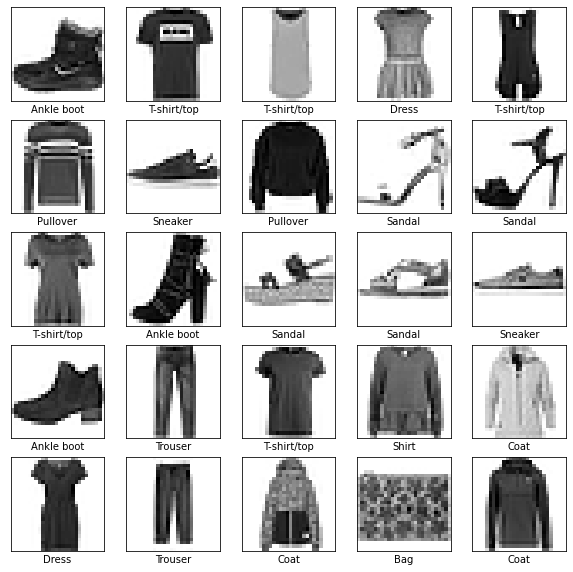

In [34]:
# run the test harness for evaluating a model
# def run_test_harness():
	# load dataset
trainX, trainY, testX, testY = load_dataset()


In [35]:
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)


In [ ]:
# evaluate model
scores, histories = evaluate_model(trainX, trainY)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


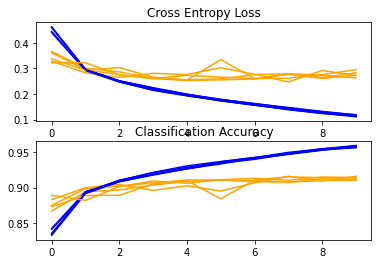

In [38]:
# learning curves
summarize_diagnostics(histories)


Accuracy: mean=91.265 std=0.218, n=5


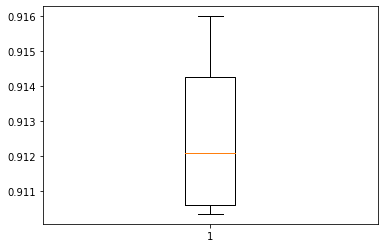

In [39]:
# summarize estimated performance
summarize_performance(scores)

In [40]:
model = define_model()
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)
model.save('mnist_fashion_predict.h5')

Epoch 1/10
1875/1875 - 4s - loss: 0.4435 - accuracy: 0.8383 - 4s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.2868 - accuracy: 0.8959 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.2463 - accuracy: 0.9093 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.2183 - accuracy: 0.9189 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.1956 - accuracy: 0.9285 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: 0.1767 - accuracy: 0.9351 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 4s - loss: 0.1611 - accuracy: 0.9413 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.1461 - accuracy: 0.9463 - 4s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 4s - loss: 0.1348 - accuracy: 0.9509 - 4s/epoch - 2ms/step
Epoch 10/10
1875/1875 - 4s - loss: 0.1224 - accuracy: 0.9556 - 4s/epoch - 2ms/step


# ***PREDICTION CODE***

In [41]:
from keras.models import load_model

In [42]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [43]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 

In [44]:
# run the test harness for evaluating a model
# def run_test_harness():
	# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# load model
model = load_model('mnist_fashion_predict.h5')
# evaluate model on test dataset
_, acc = model.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.2887 - accuracy: 0.9100
> 91.000


# ***PREDICT IMAGE***

In [45]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [50]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 12544)             0         
                                                                 
 dense_10 (Dense)            (None, 100)               1254500   
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 1,256,150
Trainable params: 1,256,150
Non-trainable params: 0
____________________________________________

In [55]:
from keras.models import Model

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(trainX[8515].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = pyplot.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size): 
      for col in range(0,col_size):
        ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
        activation_index += 1

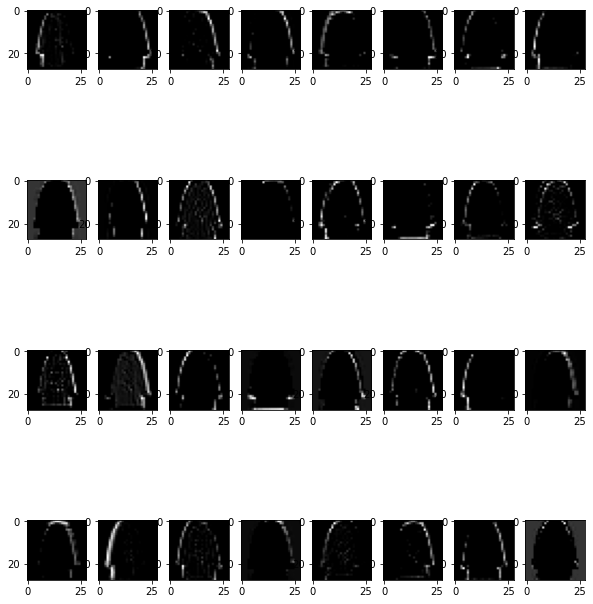

In [56]:
display_activation(activations, 8, 4, 0)

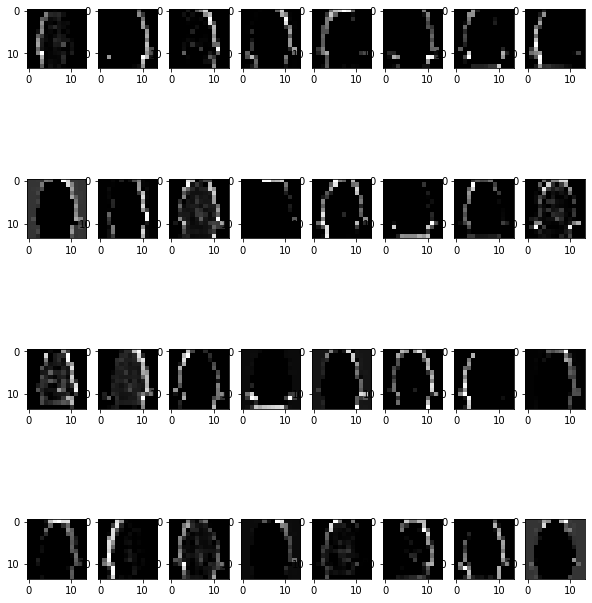

In [57]:
display_activation(activations, 8, 4, 1)

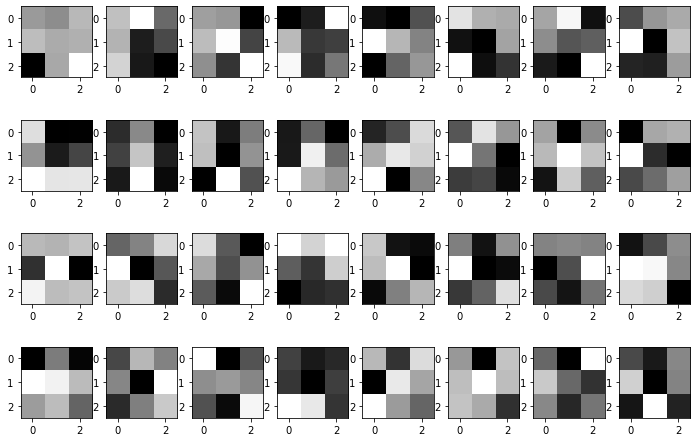

In [58]:
#get_weights [x, y, channel, nth convolutions layer ]
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 8
row_size = 4
filter_index = 0
fig, ax = pyplot.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [60]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [90]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [62]:
predictions = model.predict(testX)

In [64]:
print(predictions[0])

[1.1901789e-06 2.4092205e-07 1.5389263e-07 1.6731099e-07 1.0395348e-06
 9.9292498e-05 1.4232253e-07 3.0405939e-04 2.6170019e-06 9.9959105e-01]


In [77]:
(train_image,train_label), (test_image,test_label) = fashion_mnist.load_data()

test_image.shape

(10000, 28, 28)

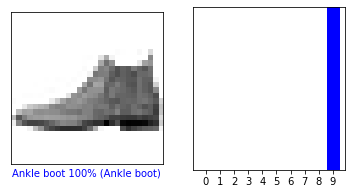

In [91]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_label)
plt.show()

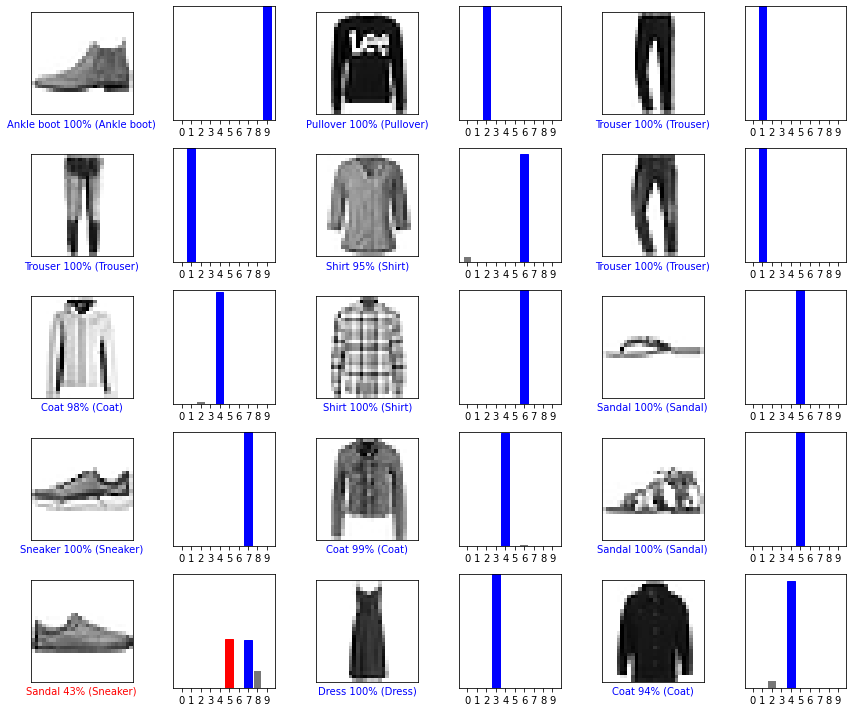

In [92]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
# plt.legend(plt.get_legend_handles_labels(),class_names)
plt.show()

[1.1147701e-05 1.7368270e-13 9.9998248e-01 9.3920649e-09 3.9688239e-06
 9.8778917e-13 2.3501859e-06 4.1689534e-12 1.4254598e-10 7.0463486e-13]
Predicted image =  Pullover


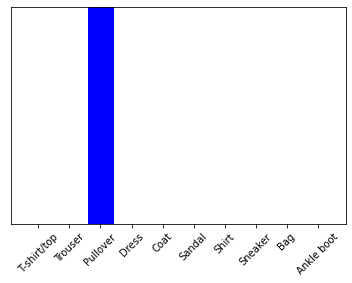

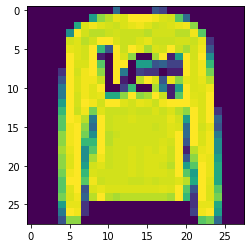

In [101]:
import numpy as np
# load an image and predict the class
# def run_example():
# load the image
img = load_image('sample_image.png')
img2=load_img('sample_image.png', color_mode="grayscale", target_size=(28, 28))

# load model
model = load_model('mnist_fashion_predict.h5')
# predict the class
result = model.predict(img)
classes_x=np.argmax(result)
print(result[0])
print("Predicted image = ",class_names[classes_x])
plot_value_array(1, result[0], test_label)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
plt.imshow(img2)